# Regression Model for Bike sharing demand

### 1. Import Libraries

In [1]:
#imporitng the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### 2: Loading Dataset

In [2]:
#Read the csv file using pandas library
bikeDemandDataFrame = pd.read_csv('day.csv')

In [3]:
#Inspect first few rows to get visually understanding of data set
bikeDemandDataFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape of data set to undertsand number of data point and number of features
bikeDemandDataFrame.shape

(730, 16)

In [5]:
#check the details of numerical data
bikeDemandDataFrame.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#check dataframe for null and datatype 
bikeDemandDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Inspect unique values
bikeDemandDataFrame.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
#check the columns of data
bikeDemandDataFrame.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#check the datatypes of data
bikeDemandDataFrame.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.
Below columns are categorial columns based on data definition as well as based on above information about their values
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit 


## 3: Cleaning Data

3.1 Drop columns which are not useful for analysis

- `instant` is just a row identifier with no business significance.
- Business is looking to understand prediction of target `cnt` which includes `casual` and `registered` hence removing these two since these not independent feature but part of outcome or target variable.    

In [10]:
# Droping instant column
bikeDemandDataFrame.drop(['instant'], axis = 1, inplace = True)

# Dropping casual and registered columns
bikeDemandDataFrame.drop(['casual'], axis = 1, inplace = True)
bikeDemandDataFrame.drop(['registered'], axis = 1, inplace = True)

In [11]:
#Inspect data frame after dropping
bikeDemandDataFrame.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
#Inspect data frame info
bikeDemandDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.

3.2 Handle Missing values

In [13]:
#Print null counts by column
bikeDemandDataFrame.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no null values.

3.3 Handle Outliers

In [14]:
### get column names handy
bikeDemandDataFrame.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

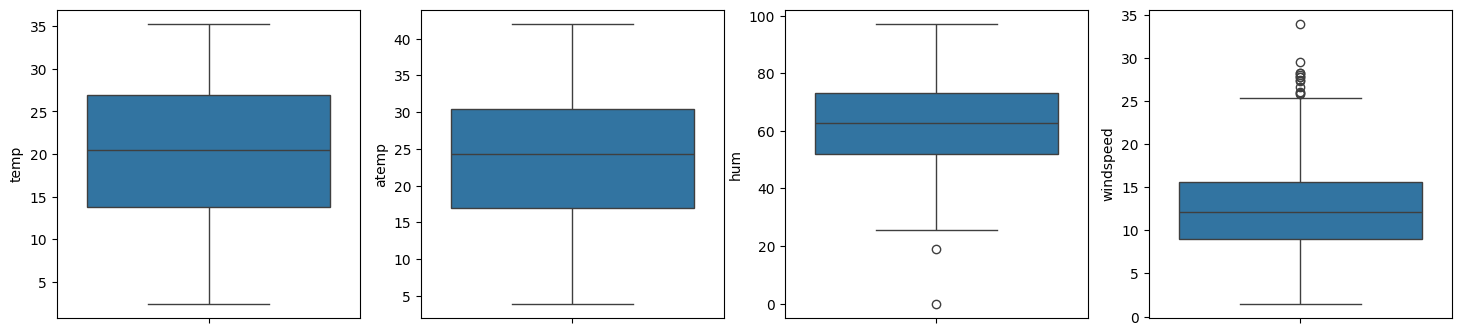

In [15]:
# Draw box plots for continuous variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

index = 1
for col in cols:
    plt.subplot(1,len(cols),index)
    sns.boxplot(y=col, data=bikeDemandDataFrame)
    index+=1

From these plots, we can see there are no outliers to be handled. (not values are at extreme end)

## 4. EDA

4.1 Convert season, mnth, weekday and weathersit to categorical types

In [16]:
bikeDemandDataFrame.weathersit.replace({1:'Fair', 2:'Misty', 3:'Rainy', 4:'HeavyRainy'}, inplace = True)
bikeDemandDataFrame.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
bikeDemandDataFrame.mnth.replace({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sept', 10: 'oct', 11: 'nov', 12: 'dec'}, inplace = True)
bikeDemandDataFrame.weekday.replace({0: 'sun', 1: 'mon', 2: 'tue', 3: 'wed', 4: 'thu', 5: 'fri', 6: 'sat'}, inplace = True)
bikeDemandDataFrame.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Fair,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Fair,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Fair,9.305237,11.46350,43.6957,12.522300,1600


#### 4.2 Derived variable

In [17]:
# Age of business based of date of data point collected and taking start date of business as '01-01-2018'
bikeDemandDataFrame['business_age'] = (pd.to_datetime(bikeDemandDataFrame['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
# Dropping dteday as we have extracted all needed derived varible from it. (some of these already existed like mnth, weekday etc)
bikeDemandDataFrame.drop(['dteday'], axis = 1, inplace = True)


In [18]:
bikeDemandDataFrame['business_age'].describe()

count    730.000000
mean     364.500000
std      210.877136
min        0.000000
25%      182.250000
50%      364.500000
75%      546.750000
max      729.000000
Name: business_age, dtype: float64

#### 4.3 Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

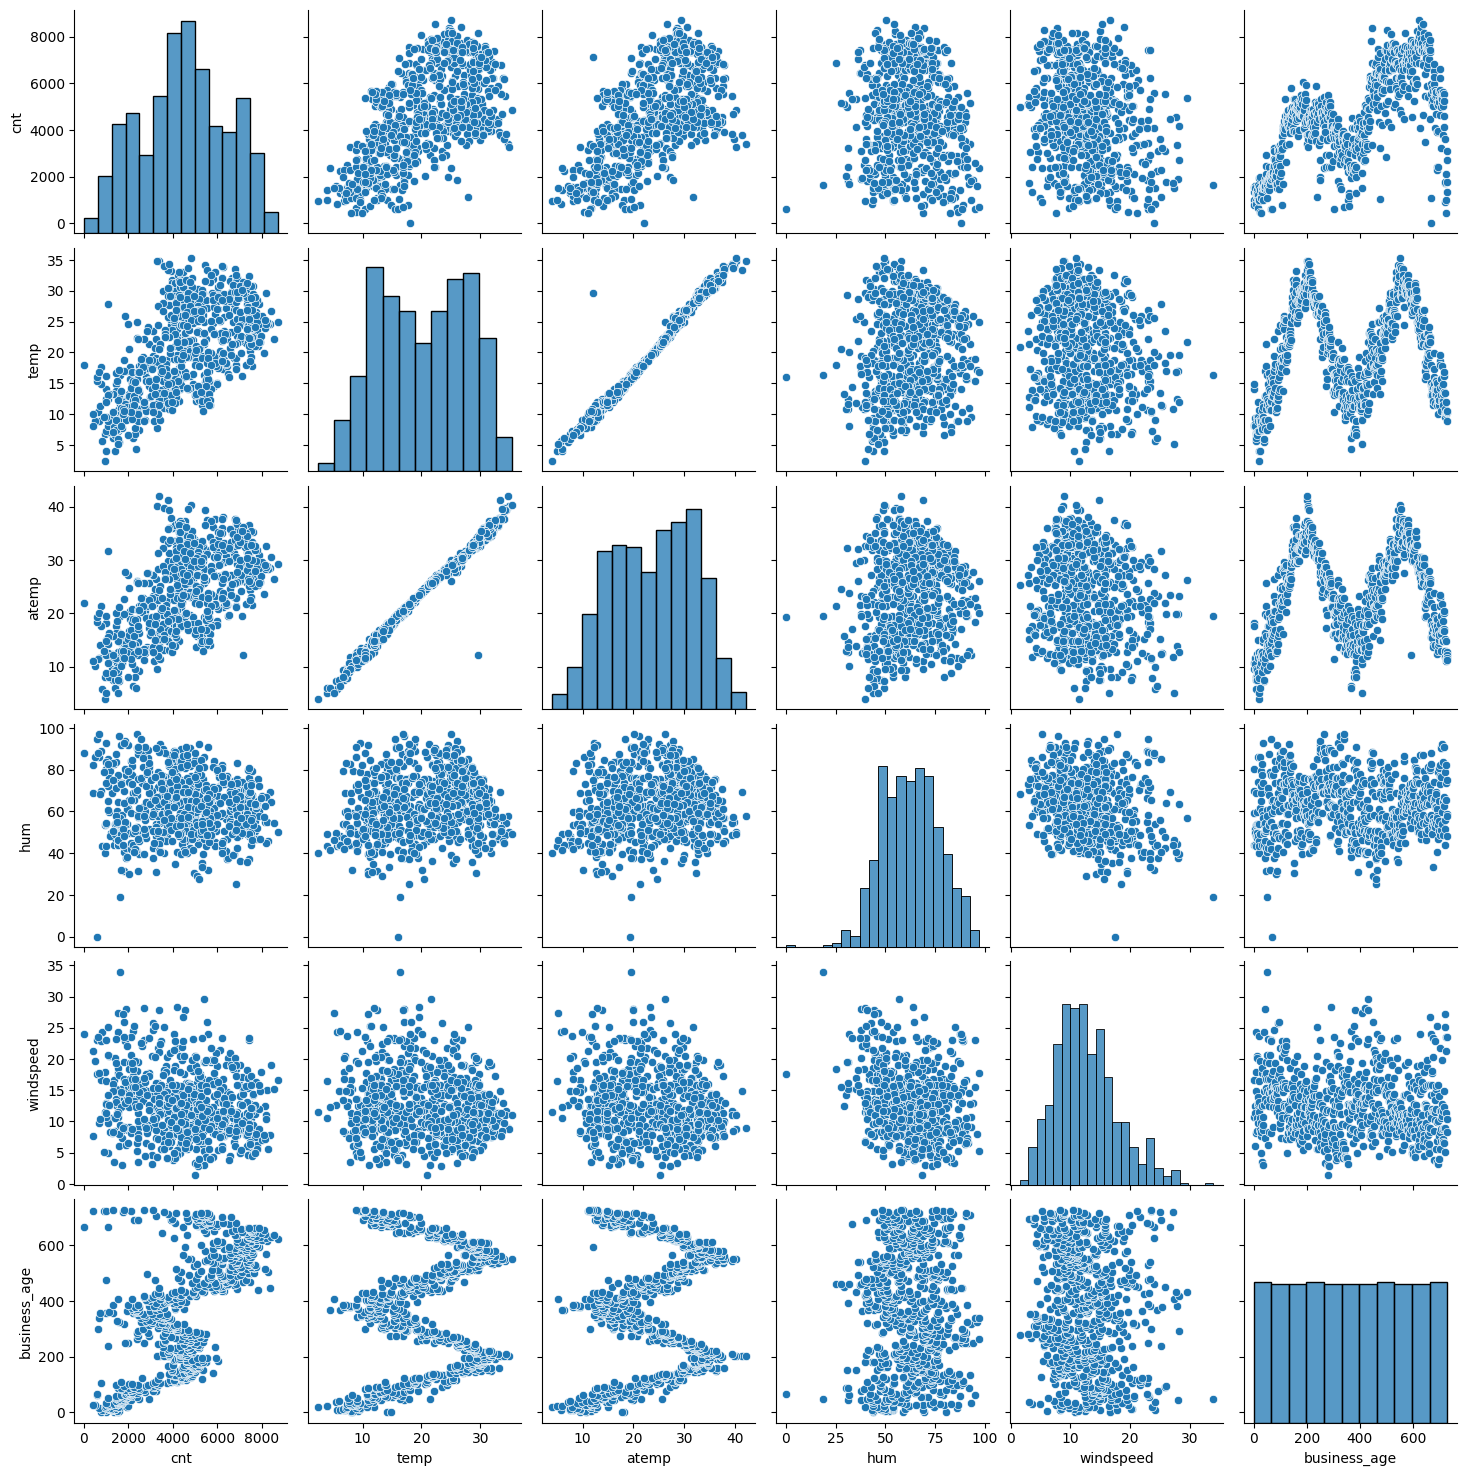

In [19]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeDemandDataFrame,vars=['cnt', 'temp', 'atemp', 'hum','windspeed', 'business_age'])
plt.show()

#### Inference
- Looks like the `temp` and `atemp` has the highest corelation with the target variable `cnt`
- `temp` and `atemp` are highly co-related with each other too
- `business_age` also has some degree of correlation with `cnt`

#### 4.4 Visualising the Data to Find the Correlation between the Numerical Variable

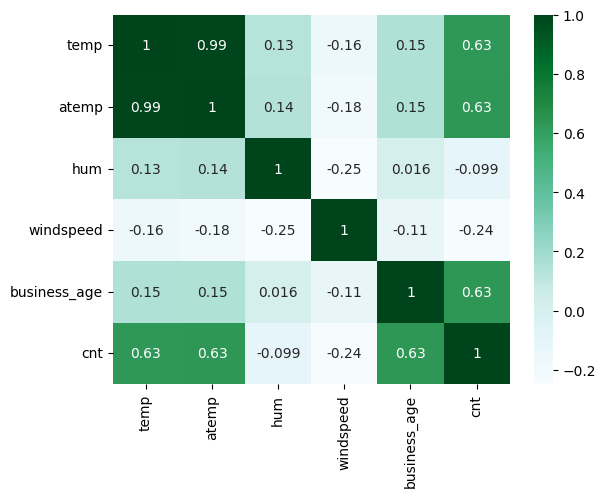

In [20]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeDemandDataFrame[['temp', 'atemp', 'hum', 'windspeed', 'business_age', 'cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Inference

- Here we see that temp and atemp are strongly correlated with each other (more than .99 means) and atemp seems to be derived from temp. Hence we can drop atemp.
- We also see that temp, atemp and business_age are the top correlating features with target variable cnt

#### 4.5 Analysing Categorical Variabels with target variables

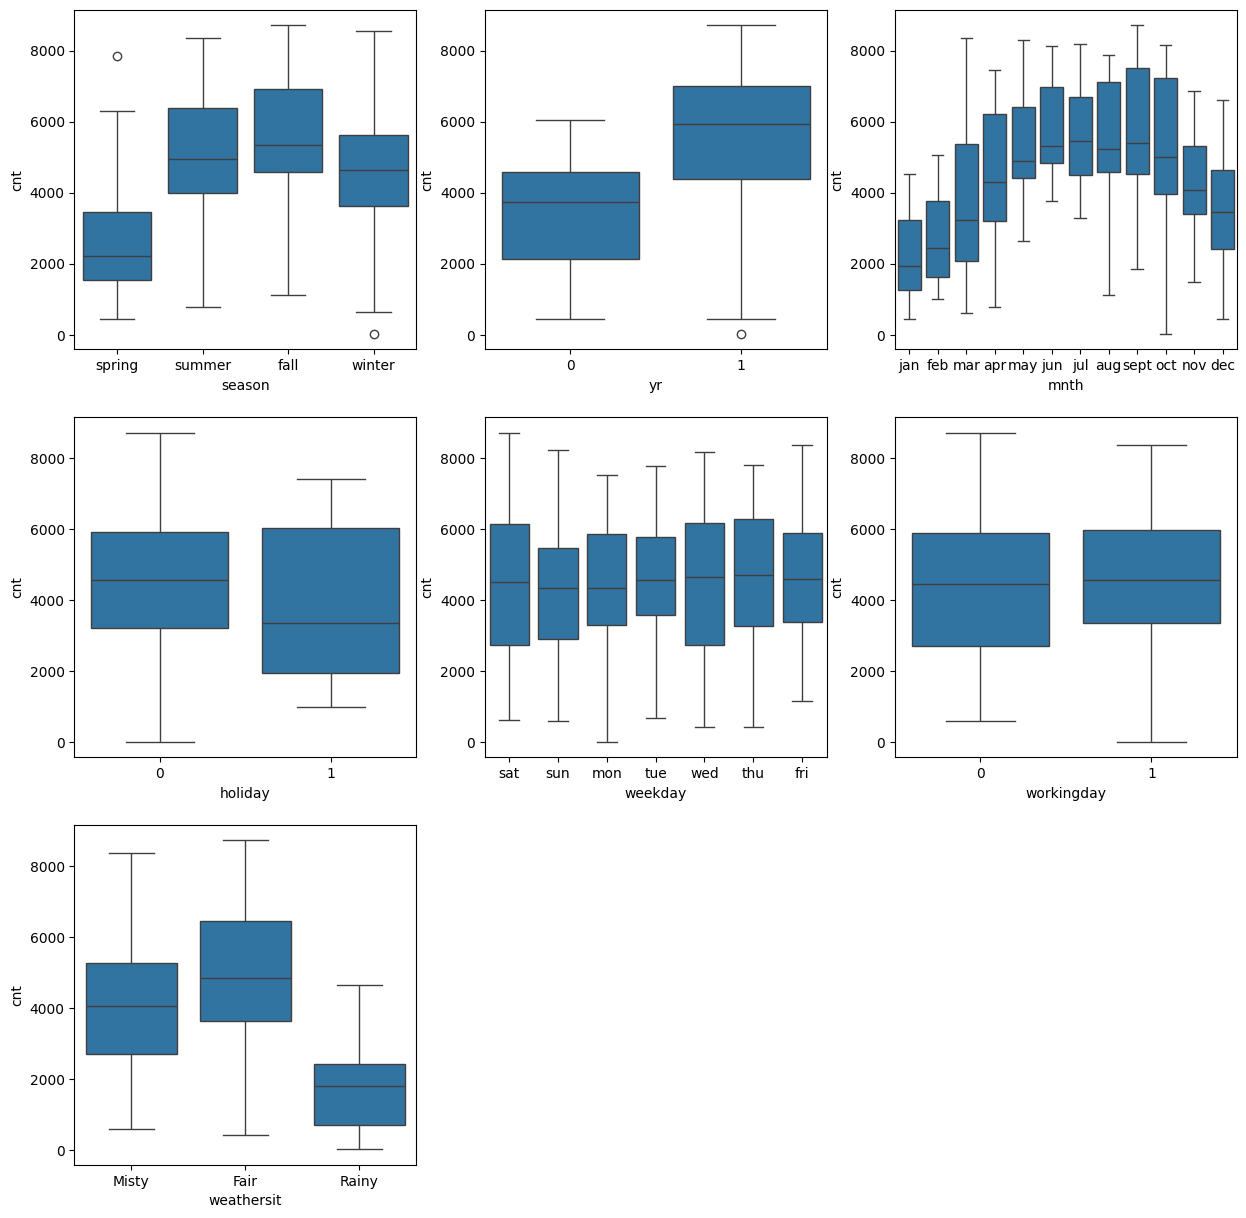

In [21]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=bikeDemandDataFrame, x=i[1], y='cnt')
plt.show()

#### Inference:
Here many insights can be drawn from the plots

1. Demand year on year is growing
2. Demand is mostly increases from January till September and decreases from September till January.
3. Weekday is not showing influence on demand.
4. When there is a holiday, demand has decreased.
5. The Fair weathershit has highest demand.
6. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

# 5. Data Preparation for Linear Regression modeling

#### 5.1 Create dummy variables for all categorical variables

In [22]:
bikeDemandDataFrame = pd.get_dummies(data=bikeDemandDataFrame,columns=["season","mnth","weekday", "weathersit"], drop_first=True, dtype=int)

- Dropping the first columns as (n-1) dummies can explain n categories.

In [23]:
#Print columns after creating dummies
bikeDemandDataFrame.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'business_age', 'season_spring', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Misty', 'weathersit_Rainy'],
      dtype='object')

## 5.1 Split Data into training and test

In [24]:
# Checking shape before splitting
bikeDemandDataFrame.shape

(730, 31)

In [25]:
#Splitting target and independent variables
y=bikeDemandDataFrame.pop('cnt')
X=bikeDemandDataFrame

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [26]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Misty,weathersit_Rainy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### 5.2 Feature Scaling continuous variables

To make all features in same scale to interpret easily

Following columns are continous to be scaled
- temp
- atemp
- hum
- windspeed
- business_age

In [28]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','business_age']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [29]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Misty,weathersit_Rainy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.469667,0.035225,0.655577,0.541297,0.516080,0.644305,0.425771,0.478419,0.250489,0.270059,...,0.070450,0.082192,0.142857,0.158513,0.150685,0.146771,0.133072,0.131115,0.344423,0.023483
std,0.499568,0.184529,0.475645,0.229401,0.215805,0.145875,0.194383,0.292015,0.433719,0.444425,...,0.256155,0.274926,0.350270,0.365579,0.358092,0.354224,0.339986,0.337857,0.475645,0.151581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.341671,0.329183,0.526135,0.281493,0.221536,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549345,0.530137,0.644388,0.401243,0.469136,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740925,0.694260,0.751071,0.534994,0.726337,0.500000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,business_age,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Misty,weathersit_Rainy
305,0,0,1,0.396704,0.408313,0.739075,0.149294,0.418381,0,0,...,0,0,0,0,0,0,0,1,0,0
605,1,0,1,0.779864,0.730696,0.567695,0.225492,0.829904,0,0,...,0,0,0,0,0,0,0,1,0,0
617,1,0,1,0.653182,0.638708,0.517995,0.590976,0.846365,0,0,...,0,1,1,0,0,0,0,0,0,0
658,1,0,0,0.504695,0.495335,0.524422,0.359261,0.902606,0,0,...,1,0,0,0,1,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.508569,0.309466,0.891632,0,0,...,1,0,0,1,0,0,0,0,0,0


## 5.3 Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [31]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
# Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [33]:
#Columns selected by RFE and their rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('business_age', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 6),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 10),
 ('mnth_jun', False, 7),
 ('mnth_mar', False, 11),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 2),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 16),
 ('weekday_wed', False, 13),
 ('weathersit_Misty', False, 8),
 ('weathersit_Rainy', True, 1)]

## 5.4 Manual elimination

##### Function to build a model using statsmodel api

In [34]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def compute_model():
    X_train_sm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [35]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def print_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [36]:
# Columns selected by RFE. Start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'business_age', 'season_spring', 'season_winter', 'mnth_jan',
       'mnth_may', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weathersit_Rainy'],
      dtype='object')

In [37]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_nov', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_Misty'],
      dtype='object')

In [38]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [39]:
X_train_rfe.shape

(511, 15)

# 6. Build Model 

### 6.1 Model 1 - Start with all variables selected by RFE

In [40]:
#Selected columns for Model 1 - all columns selected by RFE
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     172.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          3.15e-185
Time:                        23:17:08   Log-Likelihood:                -4120.7
No. Observations:                 511   AIC:                             8273.
Df Residuals:                     495   BIC:                             8341.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3682.2452    288.716  

## Model 2

In [41]:
# Dropping the variable weekday_sat due to high p value
X_train_rfe.drop("weekday_sat", axis = 1, inplace=True)
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          9.73e-186
Time:                        23:17:08   Log-Likelihood:                -4122.2
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3788.0165    282.548  

In [42]:
# Dropping the variable workingday due to high p value
X_train_rfe.drop("workingday", axis = 1, inplace=True)
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.4
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.19e-186
Time:                        23:17:08   Log-Likelihood:                -4122.8
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     497   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3842.0421    277.955  

In [43]:
# Dropping the variable business_age   due to high VIF value
X_train_rfe.drop("business_age", axis = 1, inplace=True)
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.02e-186
Time:                        23:17:08   Log-Likelihood:                -4125.4
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     498   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3740.6505    275.471  

In [44]:
# Dropping the variable mnth_jan   due to high p value
X_train_rfe.drop("mnth_jan", axis = 1, inplace=True)
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     229.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          2.66e-187
Time:                        23:17:08   Log-Likelihood:                -4126.9
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     499   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3674.5837    273.146  

In [45]:
# Dropping the variable hum due to high VIF value
X_train_rfe.drop("hum", axis = 1, inplace=True)
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          4.33e-172
Time:                        23:17:08   Log-Likelihood:                -4165.6
No. Observations:                 511   AIC:                             8353.
Df Residuals:                     500   BIC:                             8400.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2079.5412    224.797  

In [46]:
# Dropping the variable season_winter due to high p value
X_train_rfe.drop("season_winter", axis = 1, inplace=True)
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     232.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.28e-172
Time:                        23:17:08   Log-Likelihood:                -4167.2
No. Observations:                 511   AIC:                             8354.
Df Residuals:                     501   BIC:                             8397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2330.7593    173.994  

In [47]:
# Dropping the variable mnth_may due to high p value
X_train_rfe.drop("mnth_may", axis = 1, inplace=True)
compute_model()
print_vif()

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     258.6
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.23e-172
Time:                        23:17:08   Log-Likelihood:                -4170.0
No. Observations:                 511   AIC:                             8358.
Df Residuals:                     502   BIC:                             8396.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2364.9824    174.182  

### All features not are significant (p value < 0.05) and low VIF ( < 5). Hence stopping pruning.

In [48]:
#Let us build the final model using sklearn
lr = LinearRegression()
lr.fit(X_train_rfe,y_train)
print(lr.intercept_,lr.coef_)

2364.9824457429036 [ 2121.97252151  -654.89375692  3241.96707727  -886.46371494
 -1248.81626222   707.82020909   445.51604692 -2424.55631271]


## Step 7. Model Evaluation 
### 7.1 Residucal Analysis

In [49]:
y_train_pred = lr.predict(X_train_rfe)

In [50]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.histplot(act-pred, kde = True)
    plt.title('Error Terms')
    plt.xlabel('Errors')

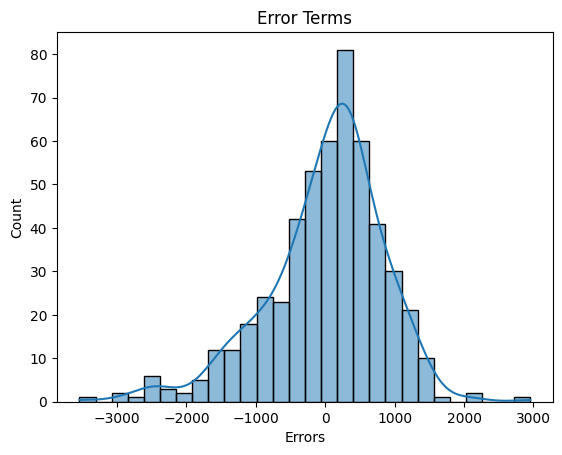

In [51]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

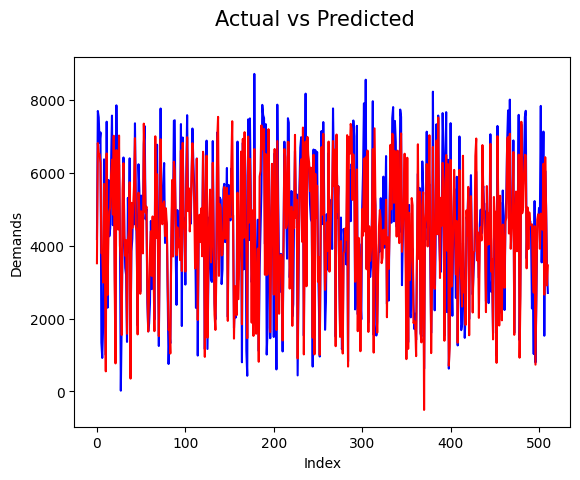

In [52]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

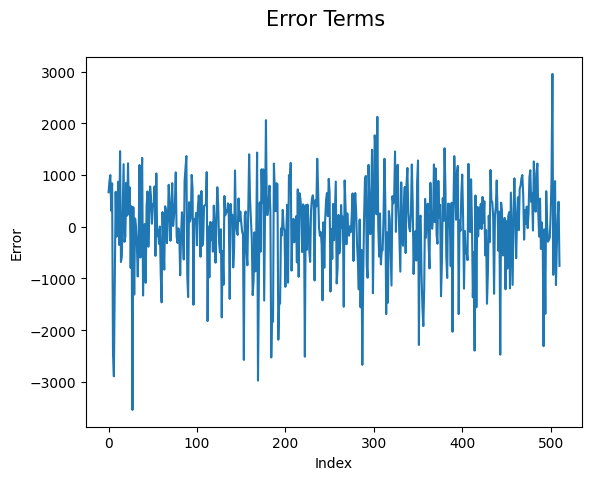

In [53]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Error')
plt.show()

#### Here, we see the error terms are independent of each other.

In [54]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8047445354449955

### Inference
R2 Same as we obtained for our final model

### 7.2 Linearity Check

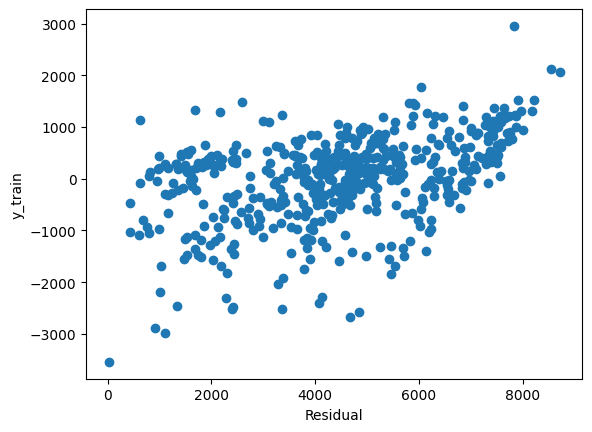

In [55]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [56]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','business_age']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [57]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[X_train_rfe.columns])

### 7.4 R-Squared value for test predictions

In [58]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7815395422861569

### 7.5 Homoscedacity

##### Inference
R2 value for predictions on test data (0.78) is almost same as that of train data (0.80). 
<br>
This is a good R-squared value and shows that models works similar on even on unseen data set.

Text(0, 0.5, 'y_test_pred')

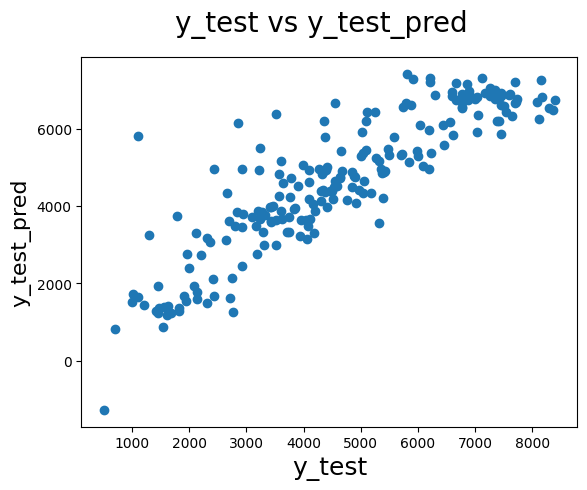

In [59]:
# Plotting y_test and y_test_pred to understand variance in error

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
# heading 
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
# X-label
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)

####  Inference
We can observe that variance of the residuals (error terms) is almost same across predictions.  i.e error term does not change much with change in predicted variable.

### 7.6 Plot Actual Test vs Predicted test values

In [60]:
#Function to plot Actual vs Predicted
#Takes Actual and Predicted values as input along with Title to indicate which data
def plot_act_pred(act, pred, dataname):
    x = [i for i in range(1, len(act) + 1, 1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(x,act, color="blue", linewidth=2, linestyle="-")
    plt.plot(x,pred, color="green",  linewidth=2, linestyle="-")
    # heading 
    fig.suptitle('Actual and Predicted - ' + dataname, fontsize=20) 
    # X-label
    plt.xlabel('Index', fontsize=18)
    # Y-label
    plt.ylabel('Counts', fontsize=16)

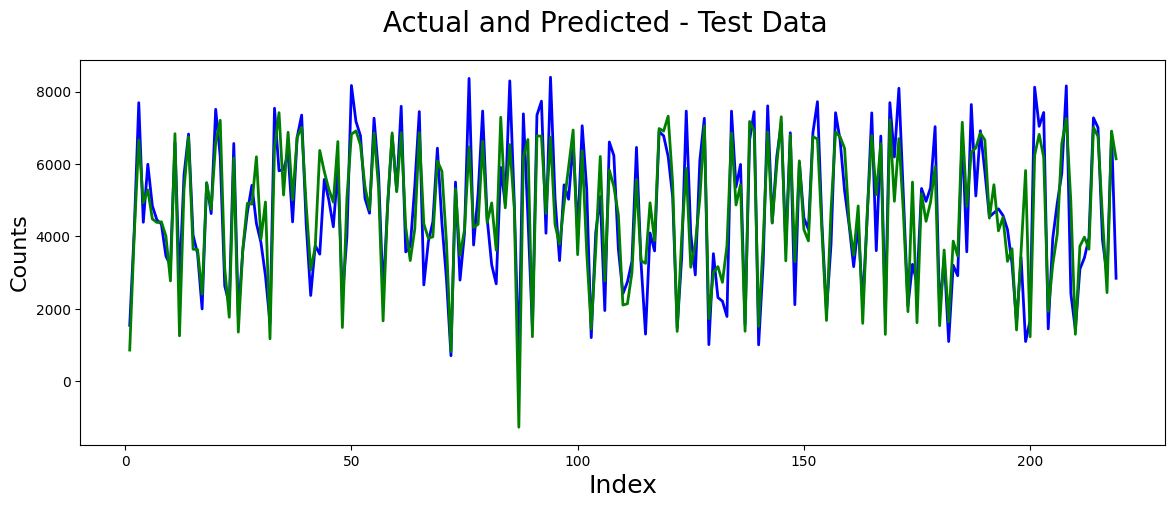

In [61]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test, y_test_pred, 'Test Data')

#### Inference
Predictions for test data is very close to actuals

### 7.7 Plot Error Terms for test data

In [62]:
# Error terms
def plot_err_terms(act, pred):
    c = [i for i in range(1, len(act) + 1, 1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    # heading 
    fig.suptitle('Error Terms', fontsize=20)
    # X-label
    plt.xlabel('Index', fontsize=18)
    # Y-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)

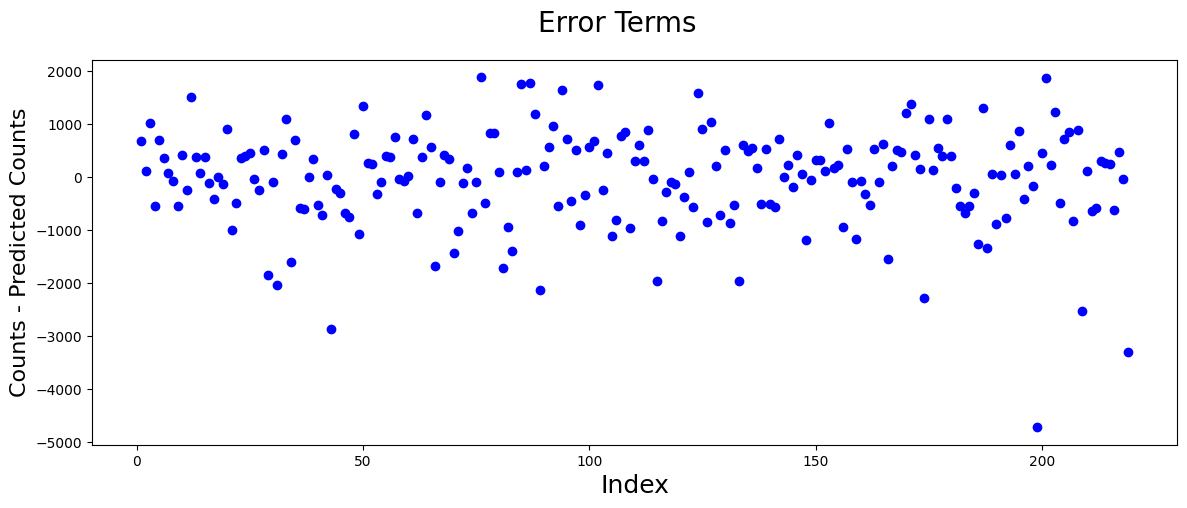

In [63]:
#Plot error terms for test data
plot_err_terms(y_test, y_test_pred)

#### Inference
Above visual shows that the error terms are randomly distributed.
<br>
There is no pattern which means the output is explained well by the model.

### 8. Interpreting Model

In [64]:
# Features selected by model
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'mnth_oct',
       'mnth_sept', 'weathersit_Rainy'],
      dtype='object')

In [65]:
print(f'intercept = {lr.intercept_}')
print(f'feature coefficients -> \n {list(zip(lr.coef_, lr.feature_names_in_))}')

intercept = 2364.9824457429036
feature coefficients -> 
 [(2121.9725215137505, 'yr'), (-654.8937569214995, 'holiday'), (3241.9670772747663, 'temp'), (-886.463714936212, 'windspeed'), (-1248.8162622206619, 'season_spring'), (707.8202090896252, 'mnth_oct'), (445.5160469178713, 'mnth_sept'), (-2424.5563127082364, 'weathersit_Rainy')]


### Analysing the above model, the comapany should focus on the following features:
- Model shows that Spring season has negative coefficent. BoomBikes should focus on expanding business during this period of time.
- There would be less bookings during Light to Heavy Snow or Rain.
- We see year over year increase in demand which indicate that there is growth opportunity in the buiness.
- Model also shows negative coefficient for holidays. BoomBikes should focus on expanding business during holidays.

### Conclusion
Significant variables to predict the demand for shared bikes
- holiday
- temp
- Sept and Oct months
- Season (Specially Spring)
- Windspeed
- Year (There is trend of year over year increase in demand in general)
- weathersit(<Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds>)